# **Sales Analysis**

In today's highly competitive business environment, having a clear understanding of your sales performance and trends is critical to achieving success. One way to do this is through the practice of sales analytics, which involves analyzing sales data, trends, and metrics to gain insights and make informed decisions. By leveraging sales analytics, businesses can set targets, forecast future sales performance, and evaluate the performance of their sales team against its goals. This process can provide valuable insights into top performing and underperforming products and services, identify problems in selling, and uncover new market opportunities. In short, sales analytics is a powerful tool that can help businesses drive revenue growth and achieve their sales objectives.

A target market analysis is an evaluation of a specific market segment that a product or service is intended for. The analysis involves identifying the characteristics, needs, and preferences of potential customers within the market segment, as well as evaluating the competitive landscape and market trends. The purpose of a target market analysis is to determine the viability and potential profitability of entering a specific market segment, as well as identifying opportunities and challenges that may arise. By conducting a target market analysis, businesses can develop a better understanding of their potential customers and their purchasing behavior, which can inform their marketing strategies and help them tailor their product or service offerings to meet the specific needs and preferences of the target market. Ultimately, a well-executed target market analysis can help businesses identify and prioritize market opportunities and optimize their efforts to maximize their return on investment.

## **About DataSet**

**Data explanation provided:**
* **Order ID:** Number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.

* **Product:** The product that have been sold.

* **Quantity Ordered:** Total items ordered in the initial order (without any changes).

* **Price Each:** The price of each product.

* **Order Date:** Date the customer is requesting the order be shipped.

* **Purchase Address:** The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.


**Objective:** The objective of this analysis is to answer the following questions regarding sales data:

* Identify the best month for sales and calculate the earnings for that month.
* Determine the city with the highest number of sales.
* Determine the optimal time to display advertisements to maximize the likelihood of customer purchases.
* Determine the product that sold the most and provide insights on why it achieved the highest sales volume.

By addressing these questions, we aim to gain valuable insights into sales patterns, customer behavior, and factors influencing product performance, which can inform future business strategies and decision-making processes.

## **Libraries**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING THE DATA
path = r'/home/fernandor/Documents/Notebooks_Practica/sales'

files = Path(path).glob('*.csv')  # .glob to get subdirectories

dfs = list()
for f in files:
    data = pd.read_csv(f)
    
    # .stem is method for pathlib objects to get the filename w/o the extension
    dfs.append(data)
df = pd.concat(dfs)
df = pd.DataFrame(df)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## **Undertanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


It will be necessary to modify the data type in some columns to be able to manipulate and perform operations with them.

In [4]:
df.describe().transpose()

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


We will check this again after converting to float64 since we have numerical values with a decimal point in the sales prices. 

In [5]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Since we have exactly the same number of nan values in all columns we can almost assume that they are completely empty records that we cannot fill.

In [6]:
duplicates = df[df.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
138,NaN,NaN,NaN,NaN,NaN,NaN
288,279069,USB-C Charging Cable,1,11.95,11/14/19 16:30,"593 South St, San Francisco, CA 94016"
544,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN
734,279499,Google Phone,1,600,11/24/19 13:51,"503 Maple St, Boston, MA 02215"
...,...,...,...,...,...,...
19143,NaN,NaN,NaN,NaN,NaN,NaN
19240,277701,Lightning Charging Cable,1,14.95,10/29/19 16:21,"386 10th St, San Francisco, CA 94016"
19522,NaN,NaN,NaN,NaN,NaN,NaN
19609,278062,Wired Headphones,1,11.99,10/02/19 21:39,"769 Walnut St, San Francisco, CA 94016"


There are 1140 duplicate records.

## **Data Cleanning And Preparation**

In [7]:
# REMOVING DUPLICATE RECORDS AND NAN VALUES
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
df = df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
df = df[df['Order Date'].str[0:2]!='Or']
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [11]:
df["Month"] = df["Order Date"].dt.month_name()
df["Day"] =  df["Order Date"].dt.day_name()
df["Hour"] = df["Order Date"].dt.time

In [12]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype("int64")
df["Price Each"] = df["Price Each"].astype("float64")

In [13]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [14]:
df["City"] = df["Purchase Address"].str.split(",").str[1]

In [15]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",November,Thursday,09:54:00,11.99,New York City
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",November,Sunday,10:03:00,23.90,Austin
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",November,Tuesday,14:56:00,150.00,Los Angeles
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",November,Monday,22:24:00,149.99,Seattle
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",November,Saturday,13:56:00,99.99,Boston
...,...,...,...,...,...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",October,Saturday,04:32:00,3.84,San Francisco
20375,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",October,Monday,22:00:00,11.99,Los Angeles
20376,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",October,Wednesday,20:58:00,3.84,San Francisco
20377,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",October,Thursday,17:21:00,700.00,Seattle


In [16]:
df.describe(include = "O").transpose()

,count,unique,top,freq
Order ID,185686,178437,160873,5
Product,185686,19,USB-C Charging Cable,21859
Purchase Address,185686,140787,"193 Forest St, San Francisco, CA 94016",9
Month,185686,12,December,24944
Day,185686,7,Tuesday,27137
Hour,185686,1440,11:58:00,251
City,185686,9,San Francisco,44662


## **Data Analysis And Visualizations**

In [17]:
# FUNCTION TO PLOT THE MONTHLY SALES AND THE AVERAGE
def line_plot_sales(pivot, width, height, plotting,avg_series = None, ax = None, sort = False):
    if ax is None:
            ax = plt.gca()       
    ax = getattr(sns, plotting)(x = pivot.index, y = 'Sales', data = pivot, color = "#1687A7",  marker="o", ax = ax)
    ax.set_facecolor("white")
    ax.grid(axis = "both", linestyle = ":", zorder = 0, dashes = (1,5))
    ax.ticklabel_format(style = 'plain', axis = 'y')
    ax.spines[["right", "top"]].set_visible(False)
        
    if avg_series is not None:
        ax.axhline(y = avg_series, color = "#FF731D", linestyle = '-', linewidth = 1)
        ax.text(pivot.index[0], avg_series, f'Avg: {avg_series:,.2f}', color = "#FF731D", fontsize = 10.5, ha = 'center', va = 'bottom')

    for x, y in enumerate(pivot['Sales']):
        label = f'{y:,.0f}'
        ax.annotate(label, (x, y), textcoords = 'offset points', xytext = (0, 4), ha = 'center', fontsize = 13)
    return ax

# FUNCTION TO PLOT THE MONTHLY PRODUCTS SOLD AND THE AVERAGE
def line_plot_products(pivot, width, height, plotting,avg_series = None, ax = None, sort = False):
    if ax is None:
            ax = plt.gca()       
    ax = getattr(sns, plotting)(x = pivot.index, y = 'Quantity Ordered', data = pivot, color = "#1687A7",  marker="o", ax = ax)
    ax.set_facecolor("white")
    ax.grid(axis = "both", linestyle = ":", zorder = 0, dashes = (1,5))
    ax.ticklabel_format(style = 'plain', axis = 'y')
    ax.spines[["right", "top"]].set_visible(False)
        
    if avg_series is not None:
        ax.axhline(y = avg_series, color = "#FF731D", linestyle = '-', linewidth = 1)
        ax.text(pivot.index[0], avg_series, f'Avg: {avg_series:,.2f}', color = "#FF731D", fontsize = 10.5, ha = 'center', va = 'bottom')

    for x, y in enumerate(pivot['Quantity Ordered']):
        label = f'{y:,.0f}'
        ax.annotate(label, (x, y), textcoords = 'offset points', xytext = (0, 4), ha = 'center', fontsize = 13)
    return ax

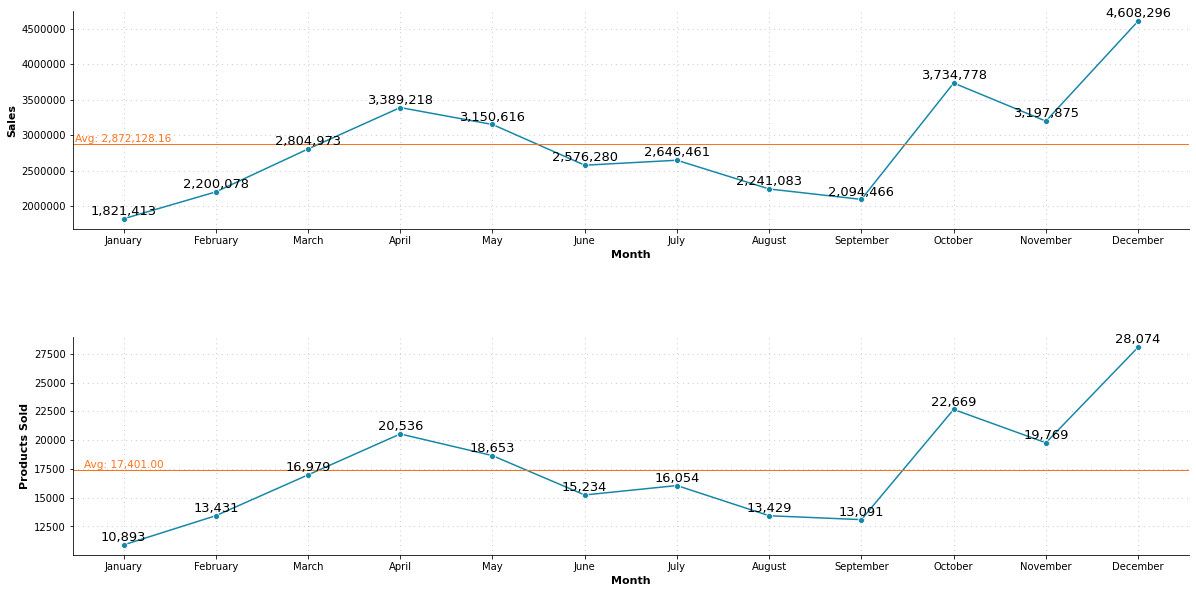

In [18]:
sales = df.groupby([df['Order Date'].dt.month,df['Order Date'].dt.strftime('%B')])["Sales"].sum().reset_index(level=0)
avg = sales['Sales'].mean()

products = df.groupby([df['Order Date'].dt.month,df['Order Date'].dt.strftime('%B')])["Quantity Ordered"].sum().reset_index(level=0)
avg2 = products['Quantity Ordered'].mean()


# POSITION
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)

# SALES
line_plot_sales(sales, 15, 6, 'lineplot', avg, ax0)
ax0.set_ylabel("Sales", fontsize = 11, fontweight = "bold")
ax0.set_xlabel("Month", fontsize = 11, fontweight = "bold")

# PRODUCTS
line_plot_products(products, 15, 6, 'lineplot', avg2, ax1)
ax1.set_ylabel("Products Sold", fontsize = 11, fontweight = "bold")
ax1.set_xlabel("Month", fontsize = 11, fontweight = "bold")

plt.show()

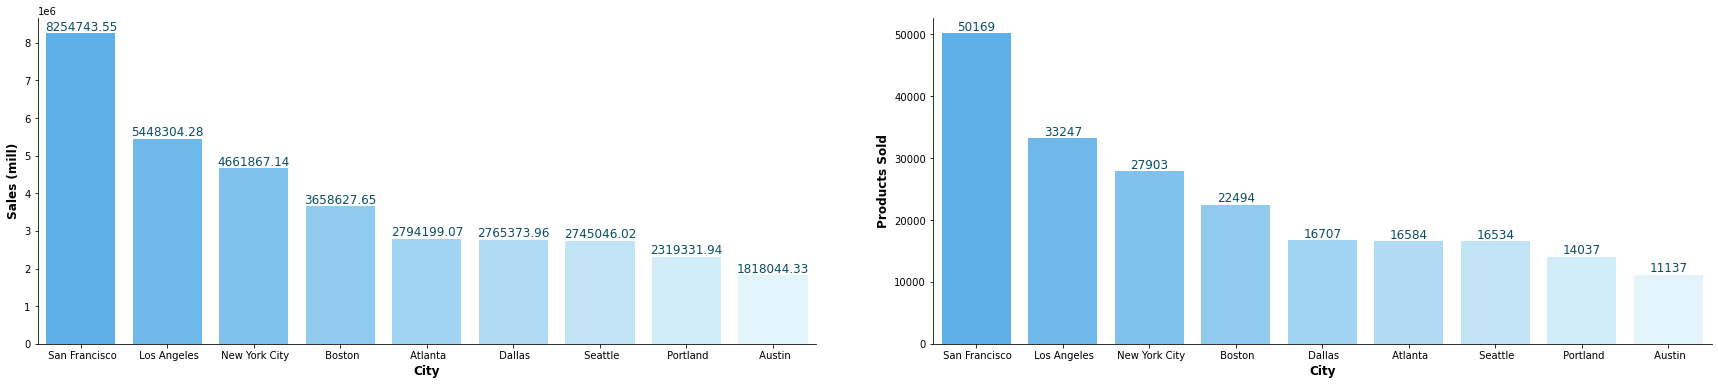

In [19]:
sales = pd.DataFrame(df.groupby("City")["Sales"].sum()).sort_values(by = "Sales", ascending = False)
products = pd.DataFrame(df.groupby("City")["Quantity Ordered"].sum()).sort_values(by = "Quantity Ordered", ascending = False)

# POSITION
fig = plt.figure(figsize = (30,6))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = .15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# SALES
ax0.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = sales, x = sales.index, y = "Sales", palette = sns.blend_palette(["#47B5FF", "#DFF6FF"], n_colors = 9), ax = ax0)
ax0.set_xlabel("City", fontsize = 12, fontweight = "bold")
ax0.set_ylabel("Sales (mill)", fontsize = 12, fontweight = "bold")
ax0.bar_label(ax0.containers[0], fontsize = 12, fmt='%.2f', label_type = "edge", color ="#0A4D68")
ax0.spines[["top", "right"]].set_visible(False)

# PRODUCTS
ax1.grid(color = "#000000", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5))
sns.barplot(data = products, x = products.index, y = "Quantity Ordered", palette = sns.blend_palette(["#47B5FF", "#DFF6FF"], n_colors = 9), ax = ax1)
ax1.set_xlabel("City", fontsize = 12, fontweight = "bold")
ax1.set_ylabel("Products Sold", fontsize = 12, fontweight = "bold")
ax1.bar_label(ax1.containers[0], fontsize = 12, fmt='%.0f', label_type = "edge", color ="#0A4D68")
ax1.spines[["top", "right"]].set_visible(False)

plt.show()

In [20]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Sales,City,Minute,Count
0,278797,Wired Headphones,1,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",November,Thursday,9,11.99,New York City,54,1
1,278798,USB-C Charging Cable,2,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",November,Sunday,10,23.90,Austin,3,1
2,278799,Apple Airpods Headphones,1,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",November,Tuesday,14,150.00,Los Angeles,56,1
3,278800,27in FHD Monitor,1,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",November,Monday,22,149.99,Seattle,24,1
4,278801,Bose SoundSport Headphones,1,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",November,Saturday,13,99.99,Boston,56,1


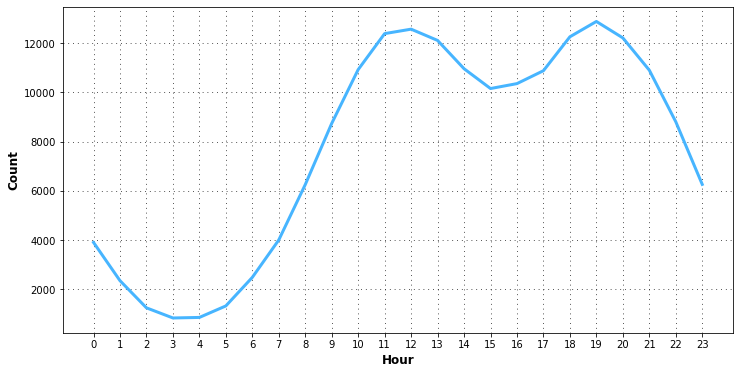

In [21]:
keys = [pair for pair, df in df.groupby(['Hour'])]

# POSITION
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0,])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)

# PLOT
ax0.grid(color = "#000000", linestyle = "-", axis = "both", zorder = 0, dashes = (1,5))
ax0.plot(keys, df.groupby(['Hour']).count()['Count'], color = "#47B5FF", linewidth = 3)
ax0.set_xlabel("Hour", fontsize = 12, fontweight = "bold")
ax0.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax0.set_xticks(keys)


plt.show()


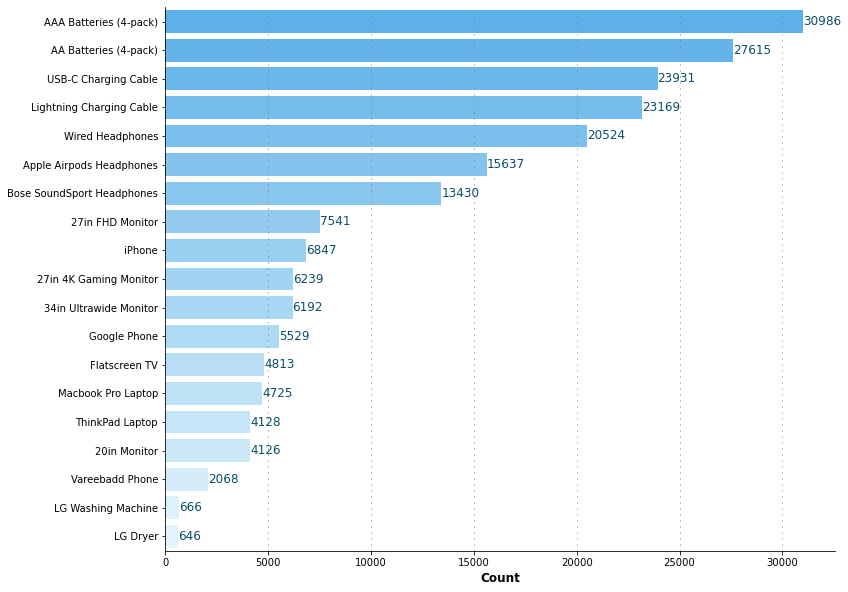

In [22]:
ps = pd.DataFrame(df.groupby("Product")["Quantity Ordered"].sum()).sort_values(by = "Quantity Ordered", ascending = False)


# POSITION
fig = plt.figure(figsize = (12,10))
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)

# PLOT
ax0.grid(color = "grey", linestyle = ":", axis = "x", zorder = 0, dashes = (1,5), linewidth = 1)
sns.barplot(data = ps, x = "Quantity Ordered", y = ps.index, palette = sns.blend_palette(["#47B5FF", "#DFF6FF"], n_colors = 19), ax = ax0)
ax0.bar_label(ax0.containers[0], fontsize = 12, label_type = "edge", color ="#0A4D68")
ax0.set_xlabel("Count", fontsize = 12, fontweight = "bold")
ax0.set_ylabel("")
ax0.spines[["top", "right"]].set_visible(False)

plt.show()

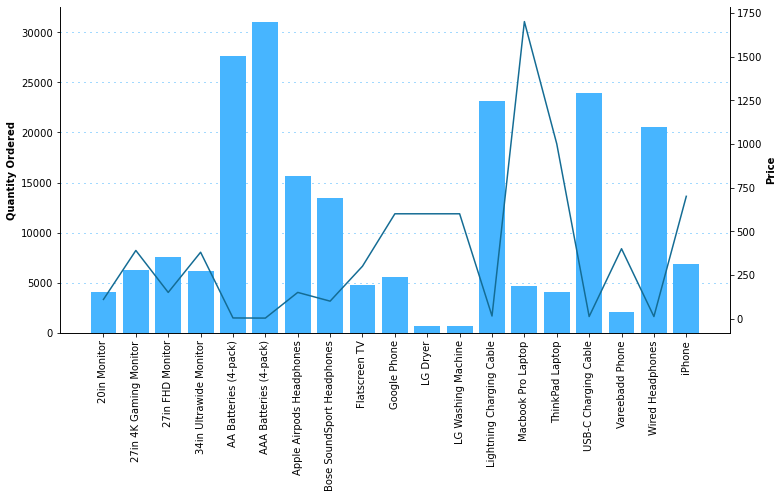

In [23]:
pg = df.groupby('Product')
qo =df.groupby('Product')['Quantity Ordered'].sum()
keys = [pair for pair, df in pg]
pr = df.groupby('Product').mean()['Price Each']

# POSITION 
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(nrows = 1, ncols = 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = ax0.twinx()

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)

ax0.grid(color = "#47B5FF", linestyle = ":", axis = "y", zorder = 0, dashes = (1,5), linewidth = 1)
ax0.bar(keys, qo, color='#47B5FF')
ax0.set_ylabel('Quantity Ordered',fontweight= "bold")
ax0.set_xticklabels(keys, rotation='vertical', size = 10)
ax0.spines[["top"]].set_visible(False)

ax1.plot(keys, pr, color='#146C94')
ax1.set_ylabel('Price', fontweight = "bold")
ax1.spines[["top"]].set_visible(False)



fig.show()

## **Conclusions**

* The best month for sales is December, with a record sales volume of $4,608,296. This can be attributed to the Christmas season when people tend to purchase groceries for baking and buy toys and gifts for their loved ones. Capitalizing on the holiday spirit and consumer demand during this time can be advantageous for businesses.

* San Francisco is the city with the highest sales, totaling $8,254,743.33. This indicates a strong market potential in San Francisco, making it a prime location for businesses to focus their marketing efforts and allocate resources accordingly.

* To maximize the effectiveness of advertisements, it is recommended to display them slightly before 11 am or 7 pm. These time slots are likely to capture the attention of potential customers during peak periods when they are more receptive to advertisements and more likely to make purchasing decisions.

* The most sold products in the dataset are AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones. These products outsell others, possibly due to their lower prices compared to larger appliances like LG Dryer or LG Washing Machine, which fall within the price range of $500 - $700. The affordability of the frequently ordered products makes them more accessible to a larger customer base, leading to increased sales volume.

In conclusion, businesses can leverage the insights from the analysis to devise effective sales and marketing strategies. Capitalizing on the peak sales month of December, particularly targeting the Christmas season, can help drive revenue growth. Additionally, focusing on the San Francisco market, strategically timing advertisement displays, and promoting affordable products can further enhance sales performance. By understanding customer preferences and market dynamics, businesses can make informed decisions to maximize their sales potential and meet the needs of their target audience.